In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [2]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_train=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
label_map = {'Iris-setosa':0,'Iris-versicolor':1, "Iris-virginica":2}
df_train["Class"] = df_train["Species"].map(label_map)

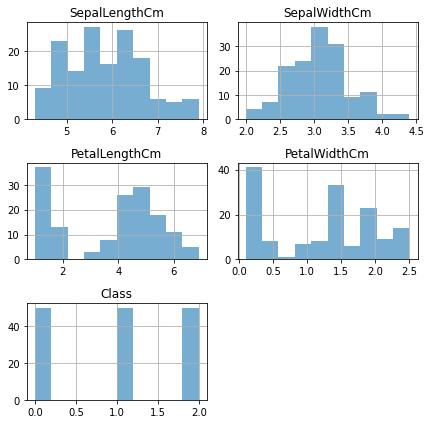

In [5]:
df_train.hist(alpha=0.6, figsize=(6,6))
plt.tight_layout()
plt.show()

array([[<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='Class', ylabel='SepalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='Class', ylabel='SepalWidthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='Class', ylabel='

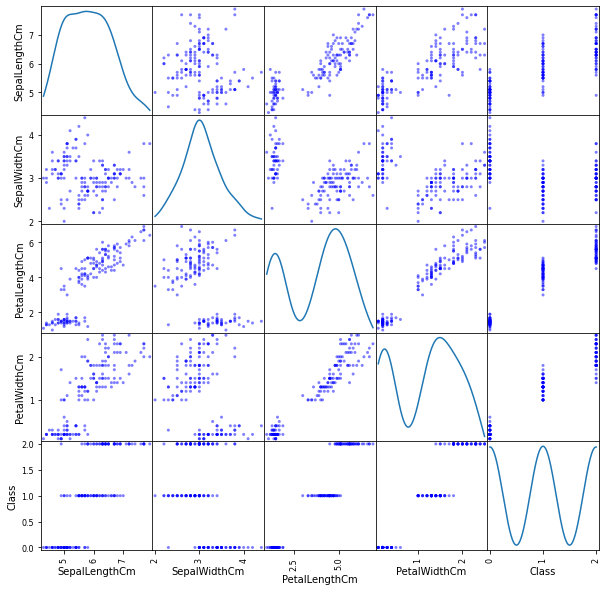

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_train,figsize=(10,10),color='b', diagonal='kde')

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


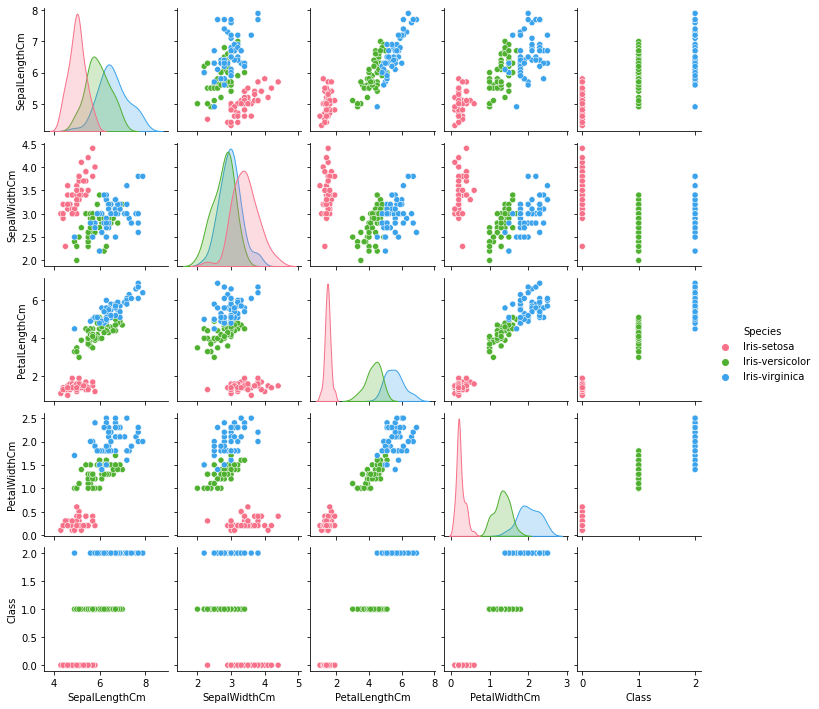

In [20]:
sns.pairplot(df_train, hue="Species",size=2, diag_kind="kde",palette="husl")

<AxesSubplot:>

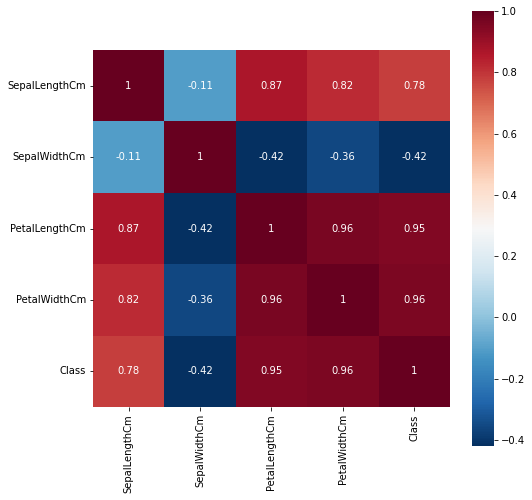

In [25]:
corr = df_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Class']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r")

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


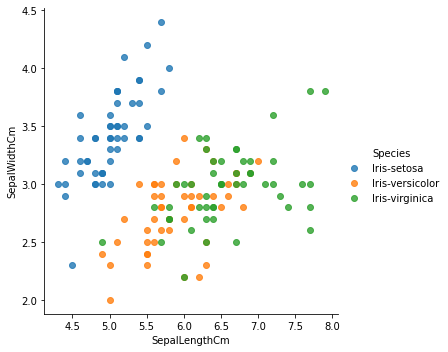

In [26]:
sns.lmplot("SepalLengthCm", "SepalWidthCm", hue='Species', data=df_train, fit_reg=False)

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


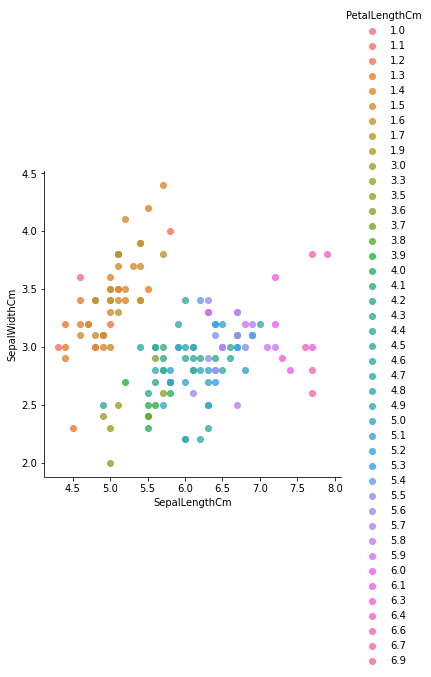

In [34]:
sns.lmplot("SepalLengthCm", "SepalWidthCm", hue='PetalLengthCm', data=df_train, fit_reg=False)

In [32]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


Text(0.5, 1.0, 'Class')

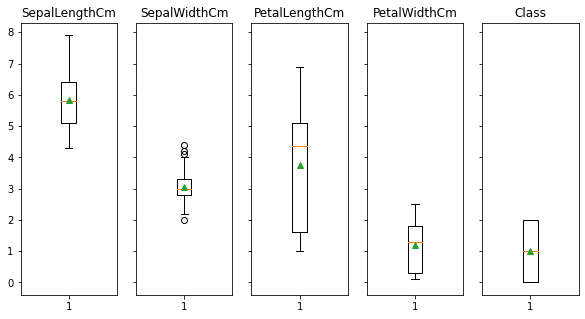

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,5), sharey=True)
axes[0].boxplot(df_train['SepalLengthCm'],showmeans=True)
axes[0].set_title('SepalLengthCm')

axes[1].boxplot(df_train['SepalWidthCm'],showmeans=True)
axes[1].set_title('SepalWidthCm')

axes[2].boxplot(df_train['PetalLengthCm'],showmeans=True)
axes[2].set_title('PetalLengthCm')

axes[3].boxplot(df_train['PetalWidthCm'],showmeans=True)
axes[3].set_title('PetalWidthCm')

axes[4].boxplot(df_train['Class'],showmeans=True)
axes[4].set_title('Class')

Text(0.5, 1.0, 'Class')

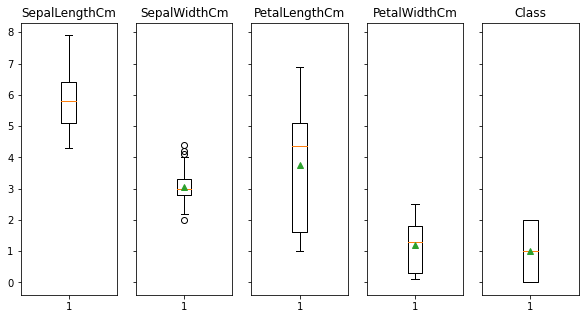

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,5), sharey=True)
axes[0].boxplot(df_train['SepalLengthCm'])
axes[0].set_title('SepalLengthCm')

axes[1].boxplot(df_train['SepalWidthCm'],showmeans=True)
axes[1].set_title('SepalWidthCm')

axes[2].boxplot(df_train['PetalLengthCm'],showmeans=True)
axes[2].set_title('PetalLengthCm')

axes[3].boxplot(df_train['PetalWidthCm'],showmeans=True)
axes[3].set_title('PetalWidthCm')

axes[4].boxplot(df_train['Class'],showmeans=True)
axes[4].set_title('Class')

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

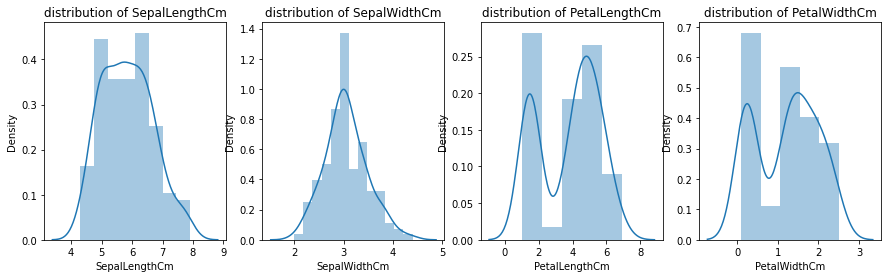

In [48]:
fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(25,5))

fig.set_size_inches(15, 4)
sns.distplot(df_train["SepalLengthCm"][:],ax=axes[0])
sns.distplot(df_train["SepalWidthCm"][:],ax=axes[1])
sns.distplot(df_train["PetalLengthCm"][:],ax=axes[2])
sns.distplot(df_train["PetalWidthCm"][:],ax=axes[3])

axes[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")